# **Deep Learning**
#Basic classification: Classify images of clothing
**Training a neural network model to classify images of clothing, like sneakers and shirts.**

In [2]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

**Import the Fashion MNIST dataset**
### We will use the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 x 28 pixels)

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


We Use Fashion MNIST for variety of purposes , and because it is now  slightly more challenging problem than regular MNIST(which was explained in class). Both datasets are relatively small and are used to verify that an algorithm works as expected.

Out of 70,000 we will divide 60,000 images to train the network and 10,000 images to evaluate or to test  how accurately the network learned to classify images.

we can get the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

**Loading the dataset,We will get four NumPy arrays**:

The  `train_images` and `train_labels` arrays are the training set—the data the model uses to learn.

The model is tested against the test set, the test_images, and test_labels arrays.
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:



In [6]:
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Preprocess the data
We must be preprocess this data before training the network,by doing so we can attain few insights

If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

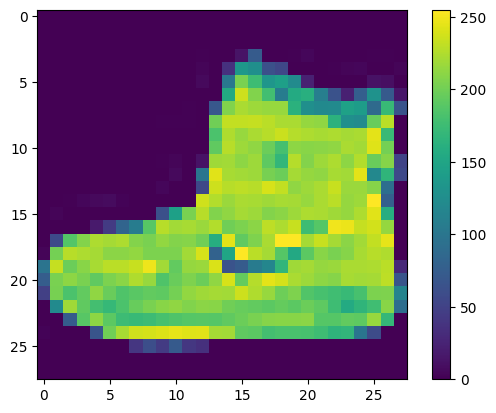

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

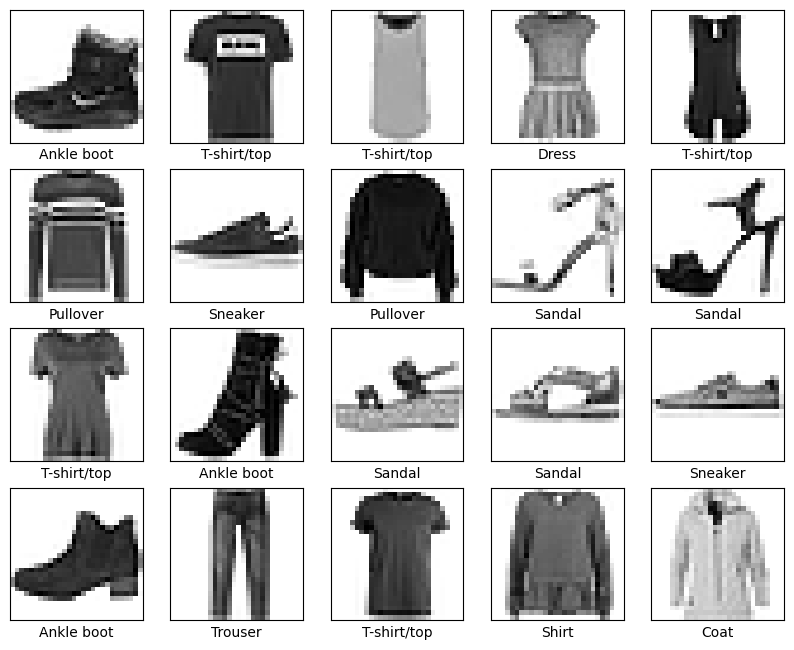

In [13]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the model
There are two steps for building the neural network:

Configuring the layers of the model.
#### 1. Compiling the model.
####2. Set up the layers.
The basic building block of a neural network is the layer.

Layers extract representations from the data fed into them.

Most of deep learning consists of chaining together simple layers.

Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Interpreting Model
1.The first layer in this network, `tf.keras.layers.Flatten`:

It transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels).

We can think of this layer as unstacking rows of pixels in the image and lining them up.

This layer has no parameters to learn; it only reformats the data.

2.After flattening pixels, the network consists of a sequence of two tf.keras.layers.Dense layers :


`These are densely connected, or fully connected, neural layers.`
####The first `Dense` layer has 128 nodes (or neurons).
The second (and last) layer returns a logits array with length of 10 (Each node contains a score that indicates the current image belongs to one of the 10 classes).

## Compiling model
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:

###Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
###Optimizer —This is how the model is updated based on the data it sees and its loss function.
###Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

##Training the model
###`Training the neural network model requires the following steps:`

Feeding the training data to the model. Here, the training data is in the `train_images` and `train_labels` arrays.
####The model learns to associate images and labels.
Then we can make model make predictions about a test set—in this example, the test_images array.
####Then verifying that the predictions match the labels from the test_labels array.
Feed the model
####To start training, call the model.fit method—so called because it "fits" the model to the training data:

In [16]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4966 - accuracy: 0.8269
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3807 - accuracy: 0.8632
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3408 - accuracy: 0.8760
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3174 - accuracy: 0.8838
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2980 - accuracy: 0.8903
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.8961
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8983
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2621 - accuracy: 0.9034
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2506 - accuracy: 0.9077
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.242

*  As the model trains, We can observe the loss and accuracy metrics.

*  This model reaches an accuracy of about 0.92 (or 92%) on the training data.

## Evaluate accuracy
Next, we compare how the model performs on the `test dataset`:

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3515 - accuracy: 0.8873 - 765ms/epoch - 2ms/step

Test accuracy: 0.8873000144958496


* We can see that the accuracy on the test dataset is a little less than the accuracy on the training dataset.

 * This gap between training accuracy and test accuracy represents `overfitting`.

* Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data.

* An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

## Make predictions
With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—

logits—to probabilities, which should be easier to interpret.

In [18]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [20]:
predictions[0]

array([2.09385598e-09, 2.12344475e-09, 8.92354766e-12, 1.15923243e-12,
       1.05397504e-07, 1.67220242e-05, 8.52316546e-08, 2.27103708e-03,
       1.22066235e-09, 9.97711957e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [21]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions
With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

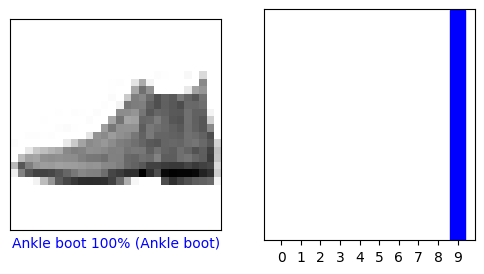

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

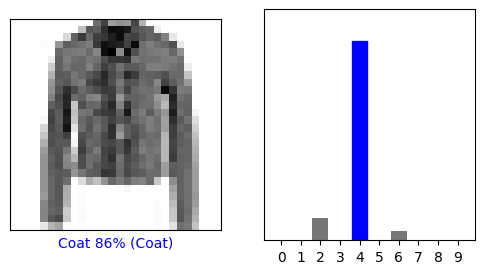

In [25]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

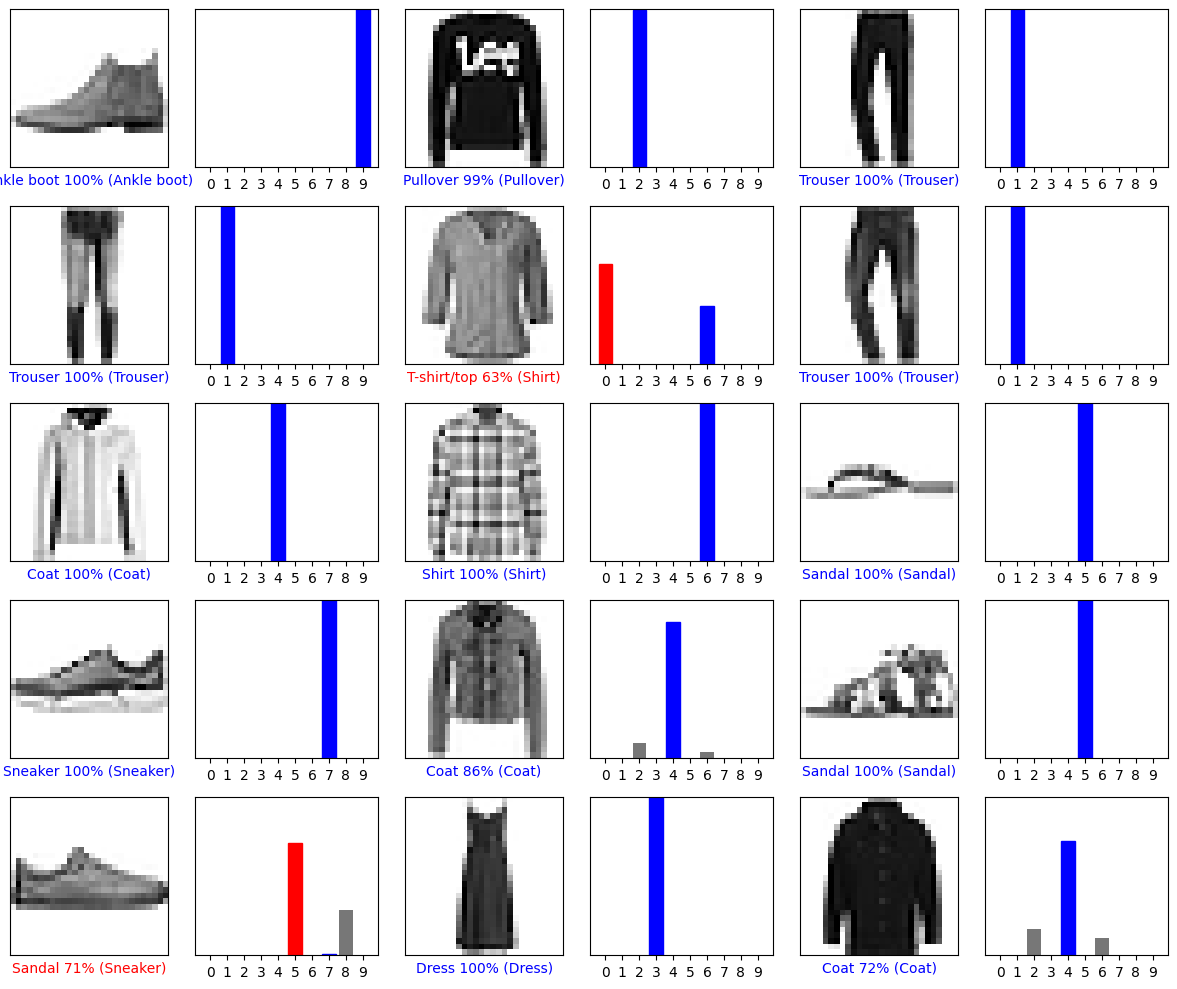

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model
Finally, use the trained model to make a prediction about a single image.

In [27]:
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 29ms/step
[[1.4008401e-04 6.5293972e-12 9.9440515e-01 1.9948923e-09 3.2755432e-03
  1.5604780e-09 2.1792080e-03 7.7086314e-14 3.2503170e-10 4.3156494e-13]]


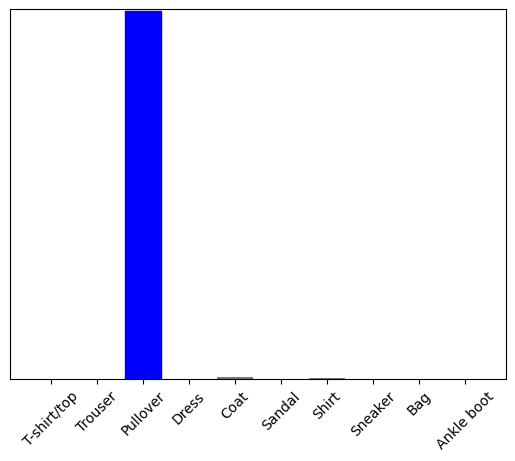

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

The model predicts a label as expected.